In [3]:
import numpy as np
import math
import matplotlib.mlab as mlab
from matplotlib import pyplot as plt

## Warmup
mu = 0
variance = 1
sigma = math.sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
gaussian = mlab.normpdf(x, mu, sigma)
plt.figure()
plt.plot(x,gaussian)

/home/osis/.local/lib/python3.6/site-packages/ipykernel_launcher.py:11: MatplotlibDeprecationWarning: scipy.stats.norm.pdf
  # This is added back by InteractiveShellApp.init_path()


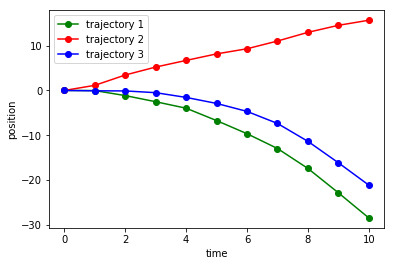

In [69]:
## Figure 1 can be replicated through running this cell.
def true_motion_sim(c,n):
    t = 1
    A = np.array([[1,t],[0,1]])
    B = np.array([[0.5 * t ** 2],[t]])
    states = np.array([[0],
                  [0]])
    
    x = np.linspace(0,10,11)
    y = states[0]
    for i in range(10):
        accel = np.random.normal(size=1)
        states = A.dot(states) + np.reshape(B.dot(accel),(-1,1))
        y = np.append(y,states[0])
    plt.plot(x,y,'-o',color=c,label='trajectory {0}'.format(n))
    
    
    
plt.figure()
plt.xlabel('time')
plt.ylabel('position')

true_motion_sim('green',1)
true_motion_sim('red',2)
true_motion_sim('blue',3)
plt.legend()

In [44]:
def kalman_filter_prediction_step_with_plot(mean,covariance,control,total_t,c,ax=None):
    delta_t = 1
    A = np.array([[1,delta_t],[0,1]])
    B = np.array([[0.5 * delta_t ** 2],[delta_t]])
    R = np.array([[0.25 * delta_t ** 4, 0.5 * delta_t ** 3],[0.5 * delta_t ** 3, delta_t ** 2]]) # state noise
    for i in range(total_t):
        control = np.random.normal(size=1)
        mean = A.dot(mean) + np.reshape(B.dot(control),(-1,1))
        covariance = A.dot(covariance).dot(A.T) + R
    if ax is not None:
        ax.set_xlabel('position')
        ax.set_ylabel('velocity')
    else:
        plt.xlabel('position')
        plt.ylabel('velocity')
    D,V = np.linalg.eig(covariance)
    t = np.linspace(0, 2*3.14, 100)
    m = V*np.sqrt(D)
    n = np.reshape(np.cos(t),(1,-1))
    n = np.append(n,np.reshape(np.sin(t),(1,-1)),axis=0)
    a = m.dot(n)
    if ax is not None:
        ax.plot(mean[0]+a[0,:], mean[1]+a[1,:],color=c,label='t={0}'.format(total_t))
    else:
        plt.plot(mean[0]+a[0,:], mean[1]+a[1,:],color=c,label='t={0}'.format(total_t))
    
    correlation = covariance[0][1] / (np.sqrt(covariance[0][0])*np.sqrt(covariance[1][1]))
    print("Correlation: ",correlation)


Correlation:  1.0
Correlation:  0.8944271909999159
Correlation:  0.8783100656536799
Correlation:  0.8728715609439696
Correlation:  0.8703882797784891


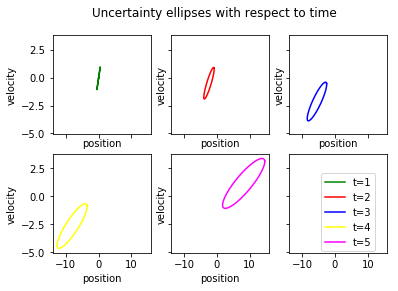

In [45]:
def figure2():
    np.random.seed(seed=2)
    accel = np.random.normal(size=1)
    means = np.array([[0],
                      [0]])
    covariance = np.array([[0,0],
                           [0,0]])
    fig, ax = plt.subplots(2, 3, sharex=True, sharey=True)
    fig.suptitle('Uncertainty ellipses with respect to time')
    kalman_filter_prediction_step_with_plot(means,covariance,accel,1,'green',ax[0][0])
    kalman_filter_prediction_step_with_plot(means,covariance,accel,2,'red',ax[0][1])
    kalman_filter_prediction_step_with_plot(means,covariance,accel,3,'blue',ax[0][2])
    kalman_filter_prediction_step_with_plot(means,covariance,accel,4,'yellow',ax[1][0])
    kalman_filter_prediction_step_with_plot(means,covariance,accel,5,'magenta',ax[1][1])
    fig.legend(loc='lower right',bbox_to_anchor=(0.88, 0.12))
figure2()

Correlation:  1.0
Correlation:  0.8944271909999159
Correlation:  0.8783100656536799
Correlation:  0.8728715609439696
Correlation:  0.8703882797784891


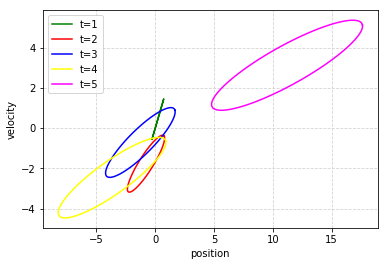

In [46]:
def figure3():
    np.random.seed(seed=3)
    accel = np.random.normal(size=1)
    means = np.array([[0],
                      [0]])
    covariance = np.array([[0,0],
                           [0,0]])
    fig = plt.figure()
    plt.grid(color='lightgray',linestyle='--')
    kalman_filter_prediction_step_with_plot(means,covariance,accel,1,'green')
    kalman_filter_prediction_step_with_plot(means,covariance,accel,2,'red')
    kalman_filter_prediction_step_with_plot(means,covariance,accel,3,'blue')
    kalman_filter_prediction_step_with_plot(means,covariance,accel,4,'yellow')
    kalman_filter_prediction_step_with_plot(means,covariance,accel,5,'magenta')
    plt.legend()
figure3()

Correlation:  0.8660687083024937
Correlation:  0.8660362293049649
Correlation:  0.866030215076776
Correlation:  0.8660271358404424
Correlation:  0.8660260803675782


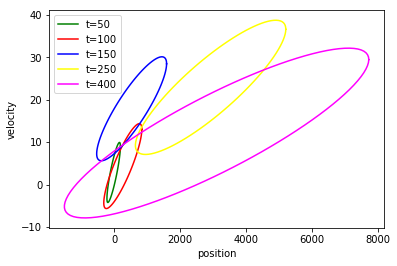

In [47]:
def figure4():
    np.random.seed(seed=4)
    accel = np.random.normal(size=1)
    means = np.array([[0],
                      [0]])
    covariance = np.array([[0,0],
                           [0,0]])
    fig = plt.figure()
    kalman_filter_prediction_step_with_plot(means,covariance,accel,50,'green')
    kalman_filter_prediction_step_with_plot(means,covariance,accel,100,'red')
    kalman_filter_prediction_step_with_plot(means,covariance,accel,150,'blue')
    kalman_filter_prediction_step_with_plot(means,covariance,accel,250,'yellow')
    kalman_filter_prediction_step_with_plot(means,covariance,accel,400,'magenta')
    plt.legend()

figure4()

[[3.33333333]
 [1.        ]]
[[6.66666667 2.        ]
 [2.         1.8       ]]


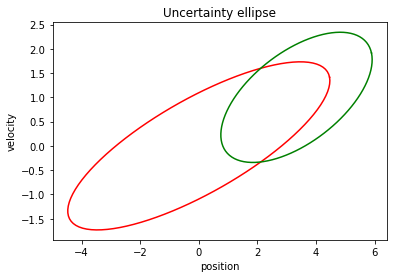

In [41]:
def plot_uncertainty_ellipse(mu,sigma,c,l=None):

        D,V = np.linalg.eig(sigma)
        t = np.linspace(0, 2*3.14, 100)
        m = V*np.sqrt(D)
        n = np.reshape(np.cos(t),(1,-1))
        n = np.append(n,np.reshape(np.sin(t),(1,-1)),axis=0)
        a = m.dot(n)
        if l is not None:
            plt.plot(mu[0]+a[0,:], mu[1]+a[1,:],color=c,label=l)
        else:
            plt.plot(mu[0]+a[0,:], mu[1]+a[1,:],color=c)
def figure5():
    


    def kalman_filter_measurement_update_with_plot(pred_state_mean,pred_state_covariance):
        C = np.array([1,0])
        Q = 10 # measurement noise
        measurement = 5
        plot_uncertainty_ellipse(pred_state_mean,pred_state_covariance,'red')
        
        pred_measurement_covariance = C.dot(pred_state_covariance).dot(C.T) + Q
        kalman_gain = pred_state_covariance.dot(C.T) / pred_measurement_covariance
        kalman_gain = np.reshape(kalman_gain,(-1,1))
        mean = pred_state_mean + np.reshape(kalman_gain.dot(measurement - C.dot(mu)),(-1,1))
        term = np.identity(np.size(mu)) - kalman_gain.dot(np.reshape(C,(1,2)))
        covariance = term.dot(pred_state_covariance)
        print(mean)
        print(covariance)
        plot_uncertainty_ellipse(mean,covariance,'green')

    mu = np.array([[0],[0]])
    sigma = np.array([[20, 6],[6, 3]])

    fig = plt.figure()
    plt.title('Uncertainty ellipse')
    plt.xlabel('position')
    plt.ylabel('velocity')
    kalman_filter_measurement_update_with_plot(mu,sigma)
figure5()

Control at time 1 = [-0.33087015]
Measurement at time 1 = [0.44122749]
Control at time 2 = [-0.25209213]
Measurement at time 2 = [3.24032421]
Control at time 3 = [1.58248112]
Measurement at time 3 = [1.20773123]
Control at time 4 = [-0.59163666]
Measurement at time 4 = [-0.43019323]
Control at time 5 = [-0.32986996]
Measurement at time 5 = [1.57291723]


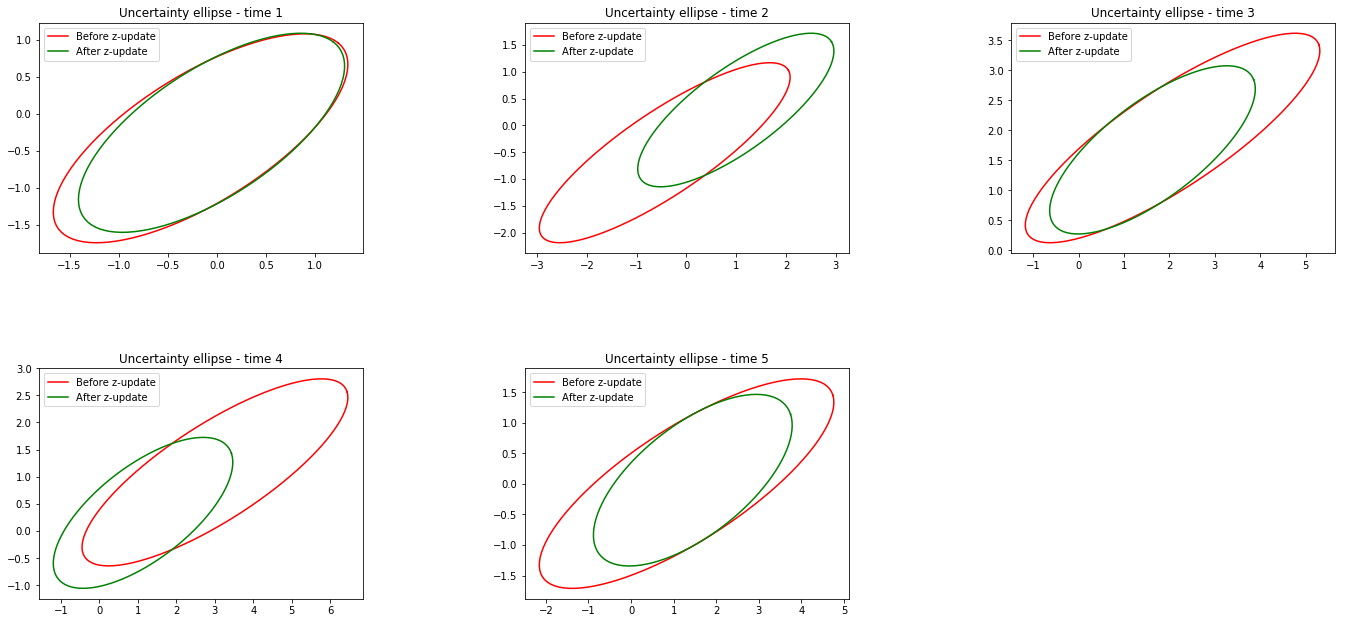

In [43]:
def kalman_filter(mean,covariance,control,measurement):
    delta_t = 1
    A = np.array([[1,delta_t],[0,1]])
    B = np.array([[0.5 * delta_t ** 2],[delta_t]])
    C = np.array([1,0])
    R = np.array([[0.25 * delta_t ** 4, 0.5 * delta_t ** 3],[0.5 * delta_t ** 3, delta_t ** 2]]) # state noise
    Q = 10
    # prediction beliefs
    pred_mean = A.dot(mean) + np.reshape(B.dot(control),(-1,1))
    pred_state_covariance = A.dot(covariance).dot(A.T) + R
    
    plot_uncertainty_ellipse(pred_mean,pred_state_covariance,'red','Before z-update')
        
    pred_measurement_covariance = C.dot(pred_state_covariance).dot(C.T) + Q
    kalman_gain = pred_state_covariance.dot(C.T) / pred_measurement_covariance
    kalman_gain = np.reshape(kalman_gain,(-1,1))
    mean = pred_mean + np.reshape(kalman_gain.dot(measurement - C.dot(pred_mean)),(-1,1))
    term = np.identity(np.size(pred_mean)) - kalman_gain.dot(np.reshape(C,(1,2)))
    covariance = term.dot(pred_state_covariance)
    
    plot_uncertainty_ellipse(mean,covariance,'green','After z-update')
    return mean,covariance

mu = np.array([[0],[0]])
sigma = np.array([[1, 0],[0, 1]])
np.random.seed(seed=5)

fig = plt.figure()

plt.xlabel('position')
plt.ylabel('velocity')
plt.subplots_adjust(left=0,right=3,bottom=0,top=2,wspace=0.5,hspace=0.5)
for i in range(1,6):
    
    plt.subplot(2,3,i)
    plt.title('Uncertainty ellipse - time {0}'.format(i))
    
    measurement = np.random.normal(loc=mu[0],scale=np.sqrt(sigma[0][0]))
    accel = np.random.normal(size=1)
    print("Control at time {0} = {1}".format(i,accel))
    print("Measurement at time {0} = {1}".format(i,measurement))
    mu,sigma = kalman_filter(mu,sigma,accel,measurement)
    plt.legend()
